### Machine Learning Example

Learning, to put it very simplistically, is the ability to make predictions and decisions based on existing knowledge. Therefore, you can kind of see how machine learning follows. It explores how algorithms or a machine are able to learn from data and provide these insights that would normally require a human to determine. However, a machine is much less capable than a human who is able to make creative and intuitive conclusions. Therefore, how can we make a machine “learn”?

There are many different machine learning models, including regressions, classifications, clustering, etc. depedning on the needs for your data. In this example, I will choose a very simple model known as the linear regression.

First, we will look at the example of students attempting to get into UBC Launchpad. Due to our neurotic nature, we’ve decided to determine our chances of making it into Launchpad using a very simple model of machine learning. I will make the very simple (and technically inaccurate) assumption that our chances of getting into Launchpad is solely dependent on the hours we spend on the application. Next, we will need to find data. In order for the machine to learn, we first need someone else to provide an example dataset with accurate information that the machine can draw conclusions from. In the following example that I will be exploring, that “someone else” will be the UBC Launchpad interviewers, who have kindly estimated the chances of a student getting in based on the effort put into their application.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Read the file:
data = pd.read_csv("Launchpad_dataset.csv")
data.head()

,Hours,Percent,Ignore
0,2.0,39.2,196
1,2.4,44.2,221
2,1.5,27.2,136
3,3.5,51.0,255
4,3.5,48.8,244


Above, I've provided a few rows of our example dataset. As we can see, someone who spent less than 2 hours on their application has an approixmate chance of 27%, whereas a student who spends about 4 hours has a ~50% chance. 

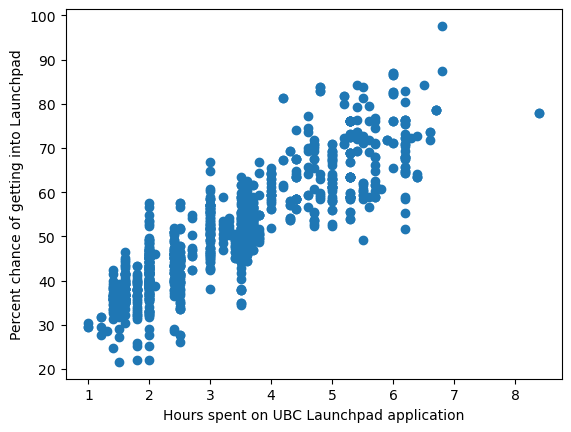

In [6]:
plt.scatter(data["Hours"] , data["Percent"])
plt.xlabel("Hours spent on UBC Launchpad application")
plt.ylabel("Percent chance of getting into Launchpad")
plt.show()

We can also quickly visualize this dataset and see that the relationship between probability and hours is approximately linear.

Next, I'll be dividing our data into two groups called the training data and a group called testing data. The training data will be the data that the machine acquires its knowledge from, essentially allowing it to determine the relationship between the two variables. The testing data is, as the name implies, the data the machine will attempt to run the model on.

In [7]:
# Generating training and testing data:
# I used 70% of the data for training
training_data = data[:(int((len(data)*0.7)))]
testing_data = data[(int((len(data)*0.7))):]

In [9]:
# Use the sklearn package to model data :
regr = linear_model.LinearRegression()
x = np.array(training_data[["Hours"]])
y = np.array(training_data[["Percent"]])
regr.fit(x,y)

LinearRegression()

We now use a simple Python package to determine the parameters for the relationship between the two variables, namely the slope and the intercept of the line. This can then be easily plotted as the red line below. 

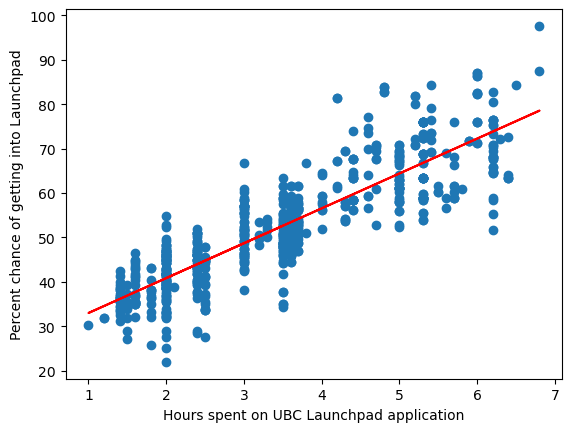

In [10]:
# Plot the regression line:
plt.scatter(training_data["Hours"], training_data["Percent"])
plt.plot(x, regr.coef_*x + regr.intercept_, "r")
plt.xlabel("Hours spent on UBC Launchpad application")
plt.ylabel("Percent chance of getting into Launchpad")
plt.show()

In [11]:
# Predicting values:
# Function for predicting future values :
def chances_of_getting_in(x,b,m):
    predicted = m*x + b
    return predicted

Thus, we have now made a very simple machine learning model, which is our linear regression. We can easily look at our chances of getting in simply by inputting the amount of hours we have spent on the application. 

In [16]:
# Predicting chances of getting in:
my_hours = 6
estimated_percent = chances_of_getting_in(my_hours,regr.intercept_[0],regr.coef_[0][0])
print(estimated_percent, "%")

72.24959781601717 %


Our next step would then be to produce values using our training data, and compare it to the test data to see the margin of error or how inaccurate the model is. I am lazy so I will skip this step and move onto the limitations and problems associated with machine learning.

### Machine Learning Problems

There are many factors that can affect how good a model is, and most of them are related to the training data. I've listed some of the most common problems below: 

- Not enough training data
    - If I had only provided 10 points instead of 1000, would my model still have made as accurate of a prediction?
- Poor quality of data
    - The training data usually needs to be cleaned up beforehand, including removing outliers. If I had included a bunch of outliers where people had spent barely any time on their applications but still had a high probability, that would've skewed my regression.
- Garbage in, garbage out
    - This is esepcially true for models that are more complex. Though this dataset was simple, in other ones that include 3 or more variables, you really want to try and maximize relevant features and minimize non relevant features.


### Machine Learning Limitations

Machine learning also has many limitations that are being worked on actively. These include the following:

1. Ethical concerns
    - Models are inherently designd by humans, so it's impossible to eliminate all biases, even within the training data itself. Maybe the interviewers that provided the data were not completely subjective and gave higher chances to be nice.
2. Deterministic problems 
    - Machine learning might be able to predict the weather, but it will not know the physics associated with weather systems. Essentially, they can find the connection between input and output, but cannot explain why.
3. Lack of data
    - Basically what I mentioned above under ML problems. Another really good example is an algorithm that detects breast cancer, but only uses mammograms from white women as training data. The model might then be biased and make inaccurate predictions for women of other races.
4. Lack of interpretability
    - How can you validate the method a model uses to come to a conclusion? In this case, it was relatively obvious as we know how linear regressions work, but could you say the same of a highly complex model?
5. Lack of reproducibility 
    - It may be hard to reproduce the results even when given the same model. Can I ensure that the model I made for the training data will work just as accurately in real life?

Data taken from https://pub.towardsai.net/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa
I modified it so I could use a different example.